In [268]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import pydot
import sklearn 
from sklearn.model_selection import GridSearchCV

In [269]:
ms=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\pandas python\mushroomsDT.csv")

In [270]:
ms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [271]:
ms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [272]:
pd.crosstab(ms['class'] ,ms['gill-color'] )
#edible=e, poisonous=p
# Which mushroom color tend to edible(eaten) and which Poisonous

gill-color,b,e,g,h,k,n,o,p,r,u,w,y
class,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64
p,1728,0,504,528,64,112,0,640,24,48,246,22


In [273]:

pd.crosstab(ms['class'] ,ms['spore-print-color'] )


spore-print-color,b,h,k,n,o,r,u,w,y
class,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48
p,0,1584,224,224,0,72,0,1812,0


In [274]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [275]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [276]:
edible = len(ms[ms["class"] == "e"])
poisonous = len(ms[ms["class"] == "p"])

print(f"There are {edible} edible mushrooms and {poisonous} poisonous mushrooms.")

There are 4208 edible mushrooms and 3916 poisonous mushrooms.


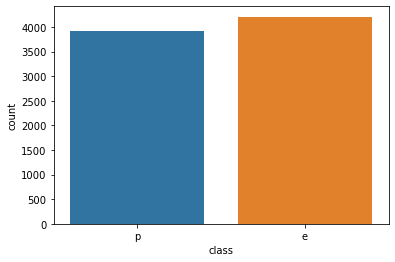

In [277]:
# Visualize this
sns.countplot(x="class", data=ms)
plt.show()

In [278]:
ms['class'].replace({'p':0,'e':1},inplace=True)

In [279]:
from sklearn.preprocessing import LabelEncoder

In [280]:
le=LabelEncoder()

In [281]:
ms[ms.select_dtypes(include=['object']).columns]= ms[ms.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [282]:
ms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,1,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,1,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,0,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [283]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

# Random Samplining Using Train_Test_Split

In [284]:
from sklearn.model_selection import train_test_split

In [285]:
train_ms,test_ms=train_test_split(ms, test_size=.2)


In [286]:
train_ms_x = train_ms.iloc[: ,1:] #select 1 to 2 last colum
train_ms_y = train_ms.iloc[: ,0]# select only 1 cols in y varialble

In [287]:
test_ms_x = test_ms.iloc[: ,1:]
test_ms_y = test_ms.iloc[: ,0]

In [247]:
train_ms.shape

(6499, 23)

In [248]:
test_ms.shape

(1625, 23)

In [249]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [250]:
dt.fit(train_ms_x,train_ms_y)

DecisionTreeClassifier()

In [251]:
dt.feature_importances_

array([0.        , 0.        , 0.00456647, 0.02827371, 0.        ,
       0.        , 0.        , 0.11423116, 0.33451995, 0.02388558,
       0.05087256, 0.        , 0.00253731, 0.01597927, 0.        ,
       0.        , 0.        , 0.00319108, 0.        , 0.21402175,
       0.17725599, 0.03066518])

In [252]:
# we should crete a data frame when we have many variable so that we can get the better idea on that
feature_imp =pd.DataFrame({'Features':train_ms_x.columns,
                           "Importance":dt.feature_importances_})

In [254]:
feature_imp.sort_values('Importance',ascending=False)# it will show max value

,Features,Importance
8,gill-color,0.334520
19,spore-print-color,0.214022
20,population,0.177256
7,gill-size,0.114231
10,stalk-root,0.050873
21,habitat,0.030665
3,bruises,0.028274
9,stalk-shape,0.023886
13,stalk-color-above-ring,0.015979
2,cap-color,0.004566


# from Feature Selection we get to know that which cols has least important to our traget variable which is class
# [veil-color,cap-shapeveil-type,stalk-color-above-ring,gill-attachment,bruises,stalk-surface-above-ring]

In [255]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

# By Using Hyper Parameter Tuning

In [256]:
search_dict = {"criterion" :["gini" , "entropy"],
               "max_depth" : (5,6,7,8),
               "min_samples_split" :(50, 75,100,150) }
# Out this combination which is best

In [257]:
grid = GridSearchCV(dt , param_grid = search_dict)
grid.fit(train_ms_x, train_ms_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (5, 6, 7, 8),
                         'min_samples_split': (50, 75, 100, 150)})

In [258]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 50}

In [259]:
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 7, min_samples_split= 50)

In [260]:
dt.fit(train_ms_x,train_ms_y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=50)

In [261]:
pred=dt.predict(test_ms_x)

In [262]:
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

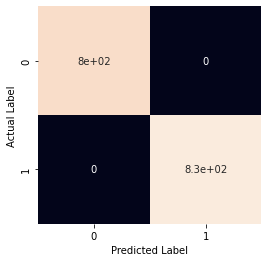

In [263]:
from sklearn.metrics import confusion_matrix, classification_report

# Plotting the confusion_matrix
def plot_conf_mat(test_ms_y,pred):
    conf_mat = confusion_matrix(test_ms_y,pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(conf_mat, annot=True, cbar=False)

    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()
    
plot_conf_mat(test_ms_y,pred)

In [264]:
print(classification_report(test_ms_y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       797
           1       1.00      1.00      1.00       828

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [195]:
from sklearn.metrics import confusion_matrix # Method 2

In [196]:
tab_ch=confusion_matrix(test_ms_y,pred)
tab_ch # form top it is prdicted sir has teach

array([[780,   0],
       [  0, 845]], dtype=int64)

In [197]:
from sklearn.metrics import accuracy_score

In [198]:
accuracy_score(test_ms_y,pred)*100

100.0

In [199]:
from sklearn.metrics import precision_score

In [200]:
precision_score(test_ms_y,pred)

1.0

In [201]:
from sklearn.metrics import recall_score

In [202]:
recall_score(test_ms_y,pred)

1.0

In [203]:
from sklearn.metrics import f1_score

In [204]:
f1_score(test_ms_y,pred)

1.0

In [265]:
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import pydot


In [266]:
dot_data = StringIO()


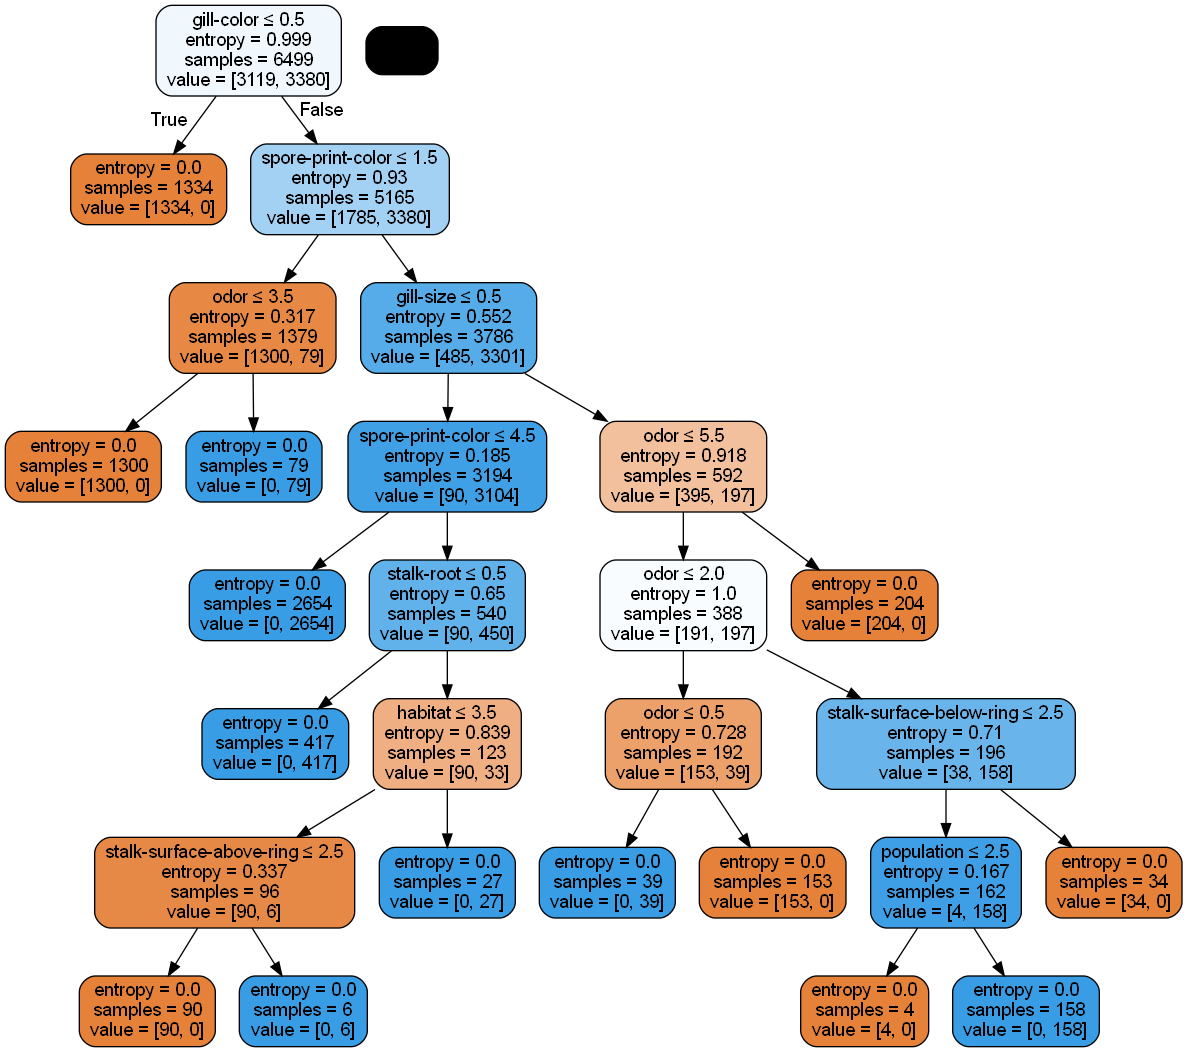

In [267]:
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=train_ms_x.columns  )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# Conclusion
# This project has extended our understanding of how to use classification algorithms and estimate accuracy levels based on various types of data. Here we have used Supervised learning algorithm(DT) and these are very popular among a very wide range of applications.